# Building a Neural Network

## Introduction:

This project will cover what neural networks are and its implementation in Python for the tass of basic recognition. This project will also explore the domain of computer vision and how it is an automation of extracting information from digital images. There are a lot of applications for computer vision such as control systems to be used in industry, facial filters in mobile apps, or security surveillance systems.

Computer vision can also be broken down into the following:
- Content recognition (Object Identification, Object detection and localisation, Object and instance segmentation or Pose estimation).
- Video analysis (Instance Tracking, Action recognition, Motion estimation).
- Content-Aware image edition.
- Scene Reconstruction.

## Breakdown of this Notebook:
- Biological neuron and its mathematical model
- Building an ANN from scratch

## 1 - Biological neuron and its Mathematical model:

Artificial Neural Networks (ANNs) are great at processing information, finding patterns and approximating complex processes. This is largely due to its structure. The structure of ANNs are drawn from the biological neuron itself.

## 1.1 - Biological Neuron:

The following shows a neuron (act ass a simple signal processing unit) that forms part of our brain, where it is built up as a large complex network of neurons that are able to process sensory inputs from the environment and turn it into thoughts or actions. The way the neuron works is explained in the following:
- Dendrites -> are where the neuron will receive the electrical inputs, this are then propagated from the synapses to the soma.
- Some -> is the main body of the neuron and it accummulates the electrical stimulation to a certain threshold, until which it will become activated. This means that the electrical impulses would be propagated further down the axon.
- Axon -> is described as the output cable of these signals where it ends in multiple synapses. These synapses can be linked to other neurons. 

## 1.2 Mathematical Model of a Neuron:

Overall, an Artificial Neuron can take in several inputs, proceeds to sum them together and then by aplying an activation function to obtain the output signal. This process can be broken down into its mathematical components.

In [5]:
import os
from IPython.display import Image

# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

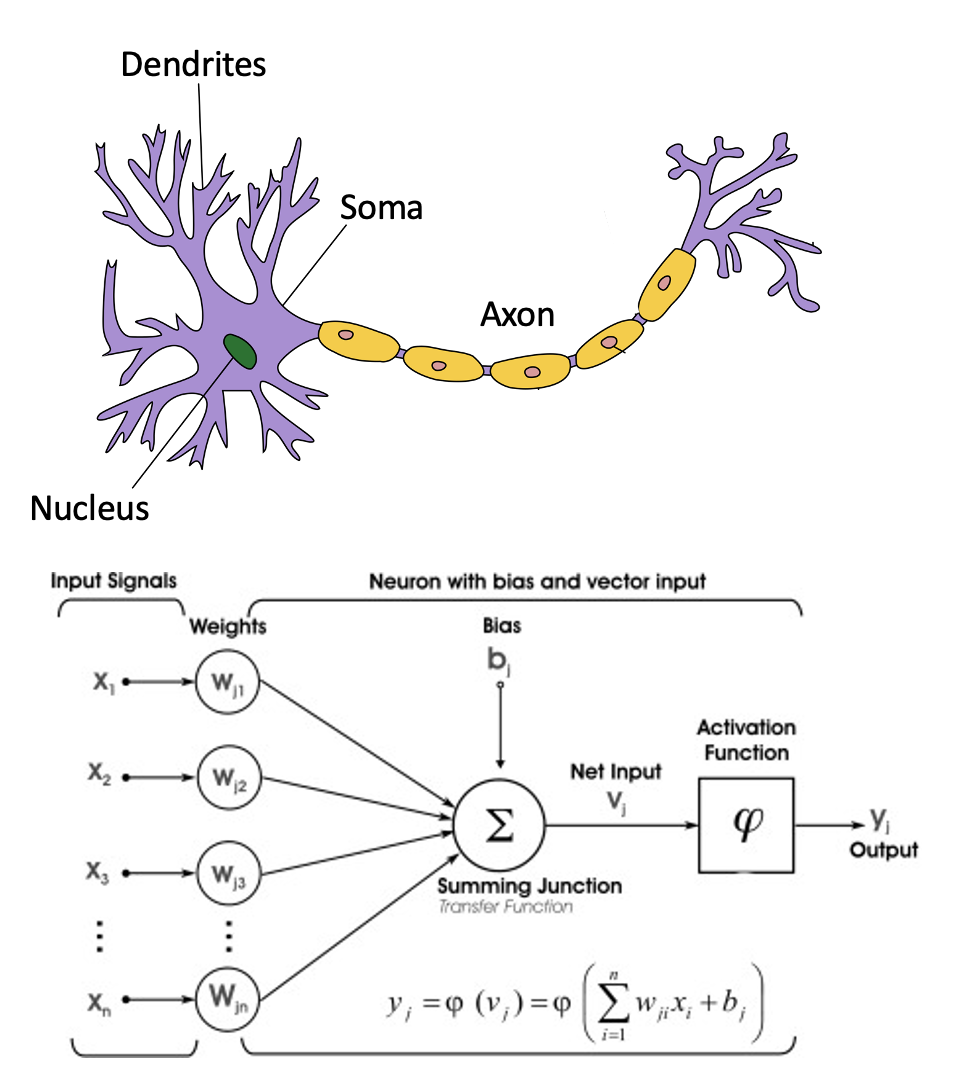

Image ref -> https://en.wikipedia.org/wiki/Neuron
Image ref -> https://www.sciencedirect.com/science/article/pii/S2214317316300427


In [6]:
# ELIZA chatbot sample code: 
display(Image(image_path + 'Neuron bio and math model.png', width=700, unconfined=True))
print('Image ref -> https://en.wikipedia.org/wiki/Neuron')
print('Image ref -> https://www.sciencedirect.com/science/article/pii/S2214317316300427')

### Mathematically:


### Types of Activation Functions:




## 2 - Building the Artificial neuron (perception):

In [7]:
import numpy as np

In [8]:
class Neuron(object):
    """ This builds a simple feed foward artificial neuron.
    Args:
        - num_inputs (int): The number of input values or input verctor size.
        - activation_func (callable): The activation function.
    Attributes:
        - W (ndarray): Weight values for each of the input.
        - b (float): The bias value, which is added to the weighted sum.
        - activation_func (callable): The activation function.
    """
    
    def __init__(self, num_inputs, activation_func):
        super().__init__()
        # Random initialisation of the weight vector and bias:
        self.W = np.random.rand(num_inputs)
        self.b = np.random.rand(1)
        self.activation_func = activation_func
    
    def forward(self, x):
        """ This builds the Forward pass of the input signal through the neuron.
        
        """
        
        z = np.dot(x, self.W) + self.b
        
        return self.activation_func(z)

## 2.1 - Test out the Artificial Neuron:

Instantiate the perceptron and forward some random input values through it.

In [21]:
# Set seed for reproducibility:
np.random.seed(42)

# Generate random input values: Shape of matrix is (1, 3)
x = np.random.rand(3).reshape(1, 3)
print('Input -> {}'.format(x))

# Instantiating the perceptron to pass the x input values:
# Create a step function:
step_func = lambda y: 0 if y <= 0 else 1

# Perceptron:
perceptron = Neuron(
    num_inputs = x.size, 
    activation_func = step_func
)

output = perceptron.forward(x)
print('Output is -> {}'.format(output))

Input -> [[0.37454012 0.95071431 0.73199394]]
Output is -> 1


## 3 - Layering the Neurons together:

